# Natural Computing

## Exercises on Evolutionary Computation

In [91]:
import tsplib95 # pip install tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline

### Exercise 6

In [161]:
tsp_problem_path = 'data/berlin52.tsp'
tsp_solution_path = 'data/berlin52.opt.tour'

In [162]:
# TSP problem information
problem = tsplib95.load_problem(tsp_problem_path)
print("--- TSP problem information ---")
print("Name: ", problem.name)
print("Comment: ", problem.comment)
print("Dimension: ", problem.dimension)
print("Edge weight type: ", problem.edge_weight_type)

--- TSP problem information ---
Name:  berlin52
Comment:  52 locations in Berlin (Groetschel)
Dimension:  52
Edge weight type:  EUC_2D


In [198]:
solution = tsplib95.load_solution(tsp_solution_path)
print("Optimal solution: ", problem.trace_tours(solution)[0])

Optimal solution:  7542


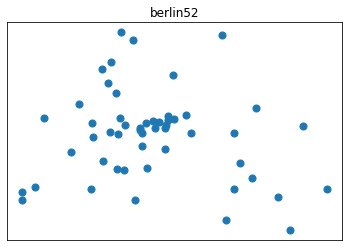

In [196]:
# Visualize TSP without edges
G = problem.get_graph()
nx.draw_networkx_nodes(G, problem.node_coords, node_size=50)
plt.title(f"{problem.name}")
plt.show()

In [149]:
# Fitness function
def total_distance(tour, problem):
    total_dist = 0
    edge_list = []
    for i in np.arange(len(tour)-1):
        a, b = tour[i], tour[i+1]
        dist = problem.wfunc(a, b)
        total_dist += dist
        edge_list.append( (a, b) )
    return total_dist, edge_list

In [192]:
# Plot tour including performance
def plot_tour(tour_length, edge_list, problem):
    nx.draw(G, pos=problem.node_coords, edgelist=edge_list, node_size=50)
    plt.title(f"{problem.name} ({tour_length})")
    plt.show()

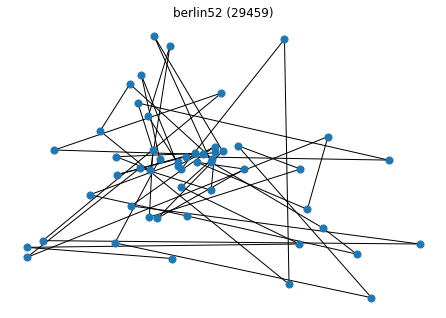

In [195]:
# Initialize TSP with random tour
nodes = list(problem.get_nodes())
nr_of_nodes = len(nodes)

initial_tour = np.random.permutation(nodes)
tour_length, edge_list = total_distance(initial_tour, problem)
plot_tour(tour_length, edge_list, problem)